In [ ]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

# PCA

In [ ]:
#Import the dataset
data=pd.read_csv('https://raw.githubusercontent.com/SanketKumarP/Bankruptcy-Prediction/main/data.csv')

In [ ]:
# Normalize the data
scaler = StandardScaler()
features = data.drop(columns=['Bankrupt?', ' Net Income Flag', ' Liability-Assets Flag'])
target = data['Bankrupt?']
features_normalized = scaler.fit_transform(features)
features_normalized = pd.DataFrame(features_normalized, columns=features.columns)

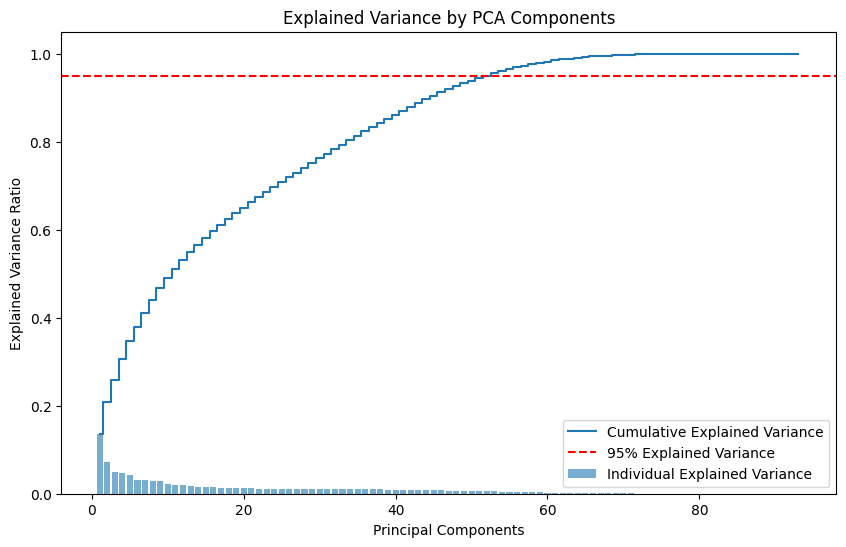

In [ ]:
from sklearn.decomposition import PCA

# Initialize PCA and fit the normalized features
pca = PCA()
principal_components = pca.fit_transform(features_normalized)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(len(features_normalized.columns))])

# Display the variance explained by each principal component
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

# Plotting the explained variance
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.6, label='Individual Explained Variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Cumulative Explained Variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.title('Explained Variance by PCA Components')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Explained Variance')
plt.legend(loc='best')
plt.show()

In [ ]:
cumulative_variance

array([0.13481761, 0.20738124, 0.25767543, 0.30529262, 0.3480951 ,
       0.37979811, 0.41061614, 0.44013988, 0.46840371, 0.48998063,
       0.51036334, 0.53040989, 0.54848549, 0.56464823, 0.58059246,
       0.59598937, 0.61011254, 0.62395701, 0.63723087, 0.64994917,
       0.66232089, 0.67410085, 0.68569973, 0.69692837, 0.70813408,
       0.71913163, 0.72999845, 0.74084173, 0.7516609 , 0.76225433,
       0.77273156, 0.78310802, 0.79340643, 0.80363027, 0.81371508,
       0.823593  , 0.83336758, 0.84308056, 0.85254057, 0.86169149,
       0.87078631, 0.87970918, 0.88833026, 0.89687709, 0.90500841,
       0.91271555, 0.91997859, 0.92678249, 0.93310172, 0.93894556,
       0.94474976, 0.95016372, 0.95538645, 0.96015122, 0.96466608,
       0.96905909, 0.97296436, 0.97646565, 0.97961115, 0.98230317,
       0.98462584, 0.98693378, 0.98876453, 0.99055244, 0.99225525,
       0.99377383, 0.99498421, 0.99593823, 0.99682526, 0.99753169,
       0.99812711, 0.99853111, 0.99884427, 0.99910825, 0.99934

In [ ]:
val = .95
index = next((i for i, x in enumerate(cumulative_variance) if x > val), None)
print(index+1)
print("Thus, 52 components explain 95% variance")

52
Thus, 52 components explain 95% variance


In [ ]:
pca_df.drop(pca_df.columns[-41:], axis=1, inplace=True)

In [ ]:
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52
0,-7.338818,0.366913,0.455469,-0.954022,-0.163500,1.209540,0.738213,-1.330924,0.683782,1.463211,...,-0.045669,0.282382,1.436694,0.163426,0.165828,0.356689,-0.334760,0.616232,-0.390277,-0.055110
1,-2.704639,-1.018281,2.379518,-2.249495,-0.836209,0.423460,0.323001,-1.427520,0.550881,1.115912,...,-0.745313,0.595454,0.350610,-0.387931,0.148865,0.492861,0.360427,0.654070,-0.346488,0.261579
2,-4.308888,-0.427493,0.341832,-0.716329,-0.335194,-0.233918,-0.031581,-0.527118,0.544565,2.399133,...,-2.110657,0.003156,-1.213992,-0.601099,-0.884346,0.643471,0.665430,0.419123,0.211107,0.373002
3,-5.830525,-1.416339,1.473699,-2.034494,-0.731384,1.166472,-0.507654,-0.006414,-0.643581,-0.317149,...,0.752767,0.124120,-0.905415,-1.552069,-0.370726,-1.151849,0.557185,-0.157416,0.903062,0.765041
4,-2.342944,-0.196016,-0.744275,-0.987006,-0.202313,0.449271,-0.323050,0.071726,-0.563377,-1.433465,...,-0.116810,0.165734,0.171120,1.306740,-0.360851,0.301931,-0.558357,-0.398586,0.117314,-0.168975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,-1.178250,-0.517479,-0.243368,0.199832,-0.063274,-0.064993,0.003511,-0.002664,-0.175035,0.018831,...,0.053465,0.523487,0.909358,0.072170,0.239590,0.067876,-0.310141,-0.109156,-0.330445,-0.250970
6815,-1.282956,-0.674875,-0.265314,-0.504905,-0.229816,-0.641743,-0.177618,0.450156,-0.389031,-0.620819,...,0.600651,0.547800,-1.464610,0.434805,-0.047564,0.227832,-0.051933,-0.500654,0.772911,0.136867
6816,1.909127,-1.735426,1.231473,1.045728,0.078158,-2.128702,-0.234481,1.792161,-0.129339,0.890188,...,-0.247869,0.857335,-0.211924,-1.184734,-0.038184,-0.153353,0.501609,0.277676,0.127286,0.707311
6817,1.854076,-0.403272,0.428762,0.775164,0.042979,0.707112,-0.351770,0.217924,-1.188116,0.083127,...,-0.462652,0.018669,0.107121,-0.298372,0.401596,0.007355,-0.110984,-0.316130,-0.017662,-0.184536


In [ ]:
pca_df["Bankrupt?"] = target
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,Bankrupt?
0,-7.338818,0.366913,0.455469,-0.954022,-0.163500,1.209540,0.738213,-1.330924,0.683782,1.463211,...,0.282382,1.436694,0.163426,0.165828,0.356689,-0.334760,0.616232,-0.390277,-0.055110,1
1,-2.704639,-1.018281,2.379518,-2.249495,-0.836209,0.423460,0.323001,-1.427520,0.550881,1.115912,...,0.595454,0.350610,-0.387931,0.148865,0.492861,0.360427,0.654070,-0.346488,0.261579,1
2,-4.308888,-0.427493,0.341832,-0.716329,-0.335194,-0.233918,-0.031581,-0.527118,0.544565,2.399133,...,0.003156,-1.213992,-0.601099,-0.884346,0.643471,0.665430,0.419123,0.211107,0.373002,1
3,-5.830525,-1.416339,1.473699,-2.034494,-0.731384,1.166472,-0.507654,-0.006414,-0.643581,-0.317149,...,0.124120,-0.905415,-1.552069,-0.370726,-1.151849,0.557185,-0.157416,0.903062,0.765041,1
4,-2.342944,-0.196016,-0.744275,-0.987006,-0.202313,0.449271,-0.323050,0.071726,-0.563377,-1.433465,...,0.165734,0.171120,1.306740,-0.360851,0.301931,-0.558357,-0.398586,0.117314,-0.168975,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,-1.178250,-0.517479,-0.243368,0.199832,-0.063274,-0.064993,0.003511,-0.002664,-0.175035,0.018831,...,0.523487,0.909358,0.072170,0.239590,0.067876,-0.310141,-0.109156,-0.330445,-0.250970,0
6815,-1.282956,-0.674875,-0.265314,-0.504905,-0.229816,-0.641743,-0.177618,0.450156,-0.389031,-0.620819,...,0.547800,-1.464610,0.434805,-0.047564,0.227832,-0.051933,-0.500654,0.772911,0.136867,0
6816,1.909127,-1.735426,1.231473,1.045728,0.078158,-2.128702,-0.234481,1.792161,-0.129339,0.890188,...,0.857335,-0.211924,-1.184734,-0.038184,-0.153353,0.501609,0.277676,0.127286,0.707311,0
6817,1.854076,-0.403272,0.428762,0.775164,0.042979,0.707112,-0.351770,0.217924,-1.188116,0.083127,...,0.018669,0.107121,-0.298372,0.401596,0.007355,-0.110984,-0.316130,-0.017662,-0.184536,0


In [ ]:
pca_df["Bankrupt?"].value_counts()

Bankrupt?
0    6599
1     220
Name: count, dtype: int64

In [ ]:
#Split the dataset into train and test set
from sklearn.model_selection import train_test_split

predictors = pca_df.drop("Bankrupt?",axis=1)
target = pca_df["Bankrupt?"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.30,random_state=42)

In [ ]:
#Different ML models
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

#Performance metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [ ]:
lr = LogisticRegression(max_iter=300).fit(X_train, Y_train)
Y_pred_lr = lr.predict(X_test)
print(classification_report(Y_test,Y_pred_lr))
cm_lr = confusion_matrix(Y_test,Y_pred_lr)
print(cm_lr)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1968
           1       0.77      0.13      0.22        78

    accuracy                           0.97      2046
   macro avg       0.87      0.56      0.60      2046
weighted avg       0.96      0.97      0.95      2046

[[1965    3]
 [  68   10]]


In [ ]:
xgb = XGBClassifier().fit(X_train, Y_train)
Y_pred_xgb = xgb.predict(X_test)
print(classification_report(Y_test,Y_pred_xgb))
cm_xgb = confusion_matrix(Y_test,Y_pred_xgb)
print(cm_xgb)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1968
           1       0.43      0.12      0.18        78

    accuracy                           0.96      2046
   macro avg       0.70      0.55      0.58      2046
weighted avg       0.95      0.96      0.95      2046

[[1956   12]
 [  69    9]]


In [ ]:
#SMOTE
import imblearn
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=42)
SX, SY = smt.fit_resample(predictors, target)
print(SY.value_counts())

Bankrupt?
1    6599
0    6599
Name: count, dtype: int64


In [ ]:
#Split the dataset into train and test set
from sklearn.model_selection import train_test_split

predictors = data.drop("Bankrupt?",axis=1)
target = data["Bankrupt?"]

SX_train,SX_test,SY_train,SY_test = train_test_split(SX,SY,test_size=0.20,random_state=42)

In [ ]:
lr = LogisticRegression(max_iter=600).fit(SX_train, SY_train)
Y_pred_lr = lr.predict(SX_test)
print(classification_report(SY_test,Y_pred_lr))
cm_lr = confusion_matrix(SY_test,Y_pred_lr)
print(cm_lr)

              precision    recall  f1-score   support

           0       0.89      0.85      0.87      1334
           1       0.86      0.90      0.88      1306

    accuracy                           0.87      2640
   macro avg       0.88      0.87      0.87      2640
weighted avg       0.88      0.87      0.87      2640

[[1140  194]
 [ 137 1169]]


In [ ]:
xgb = XGBClassifier().fit(SX_train, SY_train)
Y_pred_xgb = xgb.predict(SX_test)
print(classification_report(SY_test,Y_pred_xgb))
cm_xgb = confusion_matrix(SY_test,Y_pred_xgb)
print(cm_xgb)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1334
           1       0.96      1.00      0.98      1306

    accuracy                           0.98      2640
   macro avg       0.98      0.98      0.98      2640
weighted avg       0.98      0.98      0.98      2640

[[1280   54]
 [   6 1300]]


In [ ]:
nb = GaussianNB().fit(SX_train, SY_train)
Y_pred_nb = nb.predict(SX_test)
print(classification_report(SY_test,Y_pred_nb))
cm_nb = confusion_matrix(SY_test,Y_pred_nb)
print(cm_nb)

              precision    recall  f1-score   support

           0       0.63      0.93      0.75      1334
           1       0.86      0.44      0.59      1306

    accuracy                           0.69      2640
   macro avg       0.75      0.69      0.67      2640
weighted avg       0.74      0.69      0.67      2640

[[1240   94]
 [ 725  581]]


In [ ]:
knn = KNeighborsClassifier().fit(SX_train, SY_train)
Y_pred_knn = knn.predict(SX_test)
print(classification_report(SY_test,Y_pred_knn))
cm_knn = confusion_matrix(SY_test,Y_pred_knn)
print(cm_knn)

              precision    recall  f1-score   support

           0       1.00      0.88      0.93      1334
           1       0.89      1.00      0.94      1306

    accuracy                           0.94      2640
   macro avg       0.94      0.94      0.94      2640
weighted avg       0.94      0.94      0.94      2640

[[1168  166]
 [   0 1306]]


In [ ]:
dt = DecisionTreeClassifier().fit(SX_train, SY_train)
Y_pred_dt = dt.predict(SX_test)
print(classification_report(SY_test,Y_pred_dt))
cm_dt = confusion_matrix(SY_test,Y_pred_dt)
print(cm_dt)

              precision    recall  f1-score   support

           0       0.97      0.94      0.95      1334
           1       0.94      0.97      0.95      1306

    accuracy                           0.95      2640
   macro avg       0.95      0.95      0.95      2640
weighted avg       0.95      0.95      0.95      2640

[[1248   86]
 [  43 1263]]


In [ ]:
rf = RandomForestClassifier().fit(SX_train, SY_train)
Y_pred_rf = rf.predict(SX_test)
print(classification_report(SY_test,Y_pred_rf))
cm_rf = confusion_matrix(SY_test,Y_pred_rf)
print(cm_rf)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1334
           1       0.98      0.99      0.99      1306

    accuracy                           0.99      2640
   macro avg       0.99      0.99      0.99      2640
weighted avg       0.99      0.99      0.99      2640

[[1308   26]
 [   8 1298]]


In [ ]:
gbc = GradientBoostingClassifier().fit(SX_train, SY_train)
Y_pred_gbc = gbc.predict(SX_test)
print(classification_report(SY_test,Y_pred_gbc))
cm_gbc = confusion_matrix(SY_test,Y_pred_gbc)
print(cm_gbc)

              precision    recall  f1-score   support

           0       0.97      0.90      0.94      1334
           1       0.91      0.97      0.94      1306

    accuracy                           0.94      2640
   macro avg       0.94      0.94      0.94      2640
weighted avg       0.94      0.94      0.94      2640

[[1207  127]
 [  35 1271]]


In [ ]:
abc = AdaBoostClassifier().fit(SX_train, SY_train)
Y_pred_abc = abc.predict(SX_test)
print(classification_report(SY_test,Y_pred_abc))
cm_abc = confusion_matrix(SY_test,Y_pred_abc)
print(cm_abc)

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1334
           1       0.89      0.91      0.90      1306

    accuracy                           0.90      2640
   macro avg       0.90      0.90      0.90      2640
weighted avg       0.90      0.90      0.90      2640

[[1187  147]
 [ 112 1194]]


In [ ]:
lda = LinearDiscriminantAnalysis().fit(SX_train, SY_train)
Y_pred_lda = lda.predict(SX_test)
print(classification_report(SY_test,Y_pred_lda))
cm_lda = confusion_matrix(SY_test,Y_pred_lda)
print(cm_lda)

              precision    recall  f1-score   support

           0       0.89      0.83      0.86      1334
           1       0.84      0.89      0.87      1306

    accuracy                           0.86      2640
   macro avg       0.86      0.86      0.86      2640
weighted avg       0.86      0.86      0.86      2640

[[1113  221]
 [ 140 1166]]


In [ ]:
qda = QuadraticDiscriminantAnalysis().fit(SX_train, SY_train)
Y_pred_qda = qda.predict(SX_test)
print(classification_report(SY_test,Y_pred_qda))
cm_qda = confusion_matrix(SY_test,Y_pred_qda)
print(cm_qda)

              precision    recall  f1-score   support

           0       0.93      0.48      0.63      1334
           1       0.65      0.97      0.77      1306

    accuracy                           0.72      2640
   macro avg       0.79      0.72      0.70      2640
weighted avg       0.79      0.72      0.70      2640

[[ 640  694]
 [  45 1261]]


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

In [ ]:
model = Sequential()
model.add(Dense(32,activation='relu',input_dim=52))
model.add(Dense(32,activation='relu',input_dim=32))
model.add(Dense(16,activation='relu',input_dim=32))
model.add(Dense(1,activation='sigmoid'))
#optimizer=adam
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
# simple early stopping
es = EarlyStopping(monitor='loss', mode='min', verbose=1)
model.fit(SX_train,SY_train,epochs=750, callbacks=[es])
Y_pred_nn = model.predict(SX_test)
rounded = [round(x[0]) for x in Y_pred_nn]
Y_pred_nn = rounded
print(classification_report(SY_test,Y_pred_nn))
cm_nn_o1 = confusion_matrix(SY_test,Y_pred_nn)
print(cm_nn_o1)

Epoch 1/750
330/330 [==============================] - 3s 4ms/step - loss: 0.3353 - accuracy: 0.8617
Epoch 2/750
330/330 [==============================] - 1s 2ms/step - loss: 0.1910 - accuracy: 0.9299
Epoch 3/750
330/330 [==============================] - 1s 2ms/step - loss: 0.1437 - accuracy: 0.9536
Epoch 4/750
330/330 [==============================] - 1s 2ms/step - loss: 0.1134 - accuracy: 0.9664
Epoch 5/750
330/330 [==============================] - 1s 2ms/step - loss: 0.0991 - accuracy: 0.9710
Epoch 6/750
330/330 [==============================] - 1s 2ms/step - loss: 0.0801 - accuracy: 0.9788
Epoch 7/750
330/330 [==============================] - 1s 2ms/step - loss: 0.0701 - accuracy: 0.9802
Epoch 8/750
330/330 [==============================] - 1s 2ms/step - loss: 0.0617 - accuracy: 0.9825
Epoch 9/750
330/330 [==============================] - 1s 2ms/step - loss: 0.0524 - accuracy: 0.9854
Epoch 10/750
330/330 [==============================] - 1s 2ms/step - loss: 0.0482 - accura

In [ ]:
from sklearn.metrics import classification_report, roc_curve

83/83 [==============================] - 0s 2ms/step


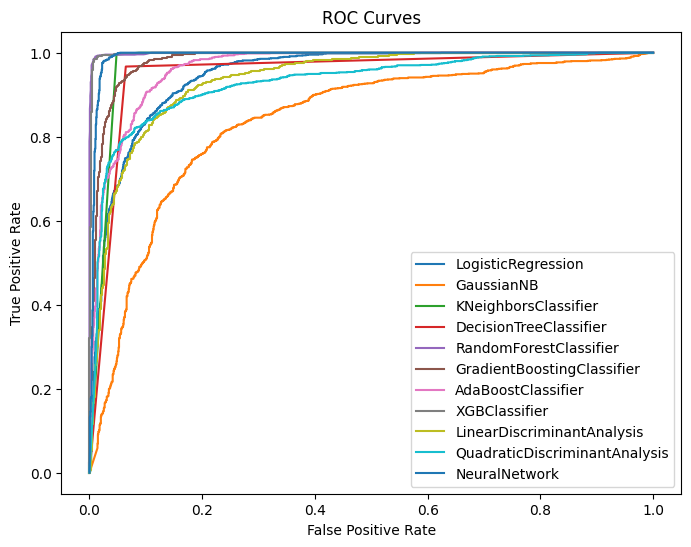

In [ ]:
#ROC Curves of the ML models
plt.figure(figsize=(8,6))

y_pred_proba_lr = lr.predict_proba(SX_test)[::,1]
lr_fpr, lr_tpr,_=roc_curve(SY_test,y_pred_proba_lr)
plt.plot(lr_fpr, lr_tpr,label="LogisticRegression")

y_pred_proba_nb = nb.predict_proba(SX_test)[::,1]
nb_fpr, nb_tpr,_=roc_curve(SY_test,y_pred_proba_nb)
plt.plot(nb_fpr, nb_tpr,label="GaussianNB")

y_pred_proba_knn = knn.predict_proba(SX_test)[::,1]
knn_fpr, knn_tpr,_=roc_curve(SY_test,y_pred_proba_knn)
plt.plot(knn_fpr, knn_tpr,label="KNeighborsClassifier")

y_pred_proba_dt = dt.predict_proba(SX_test)[::,1]
dt_fpr, dt_tpr,_=roc_curve(SY_test,y_pred_proba_dt)
plt.plot(dt_fpr, dt_tpr,label="DecisionTreeClassifier")

y_pred_proba_rf = rf.predict_proba(SX_test)[::,1]
rf_fpr, rf_tpr,_=roc_curve(SY_test,y_pred_proba_rf)
plt.plot(rf_fpr, rf_tpr,label="RandomForestClassifier")

y_pred_proba_gbc = gbc.predict_proba(SX_test)[::,1]
gbc_fpr, gbc_tpr,_=roc_curve(SY_test,y_pred_proba_gbc)
plt.plot(gbc_fpr, gbc_tpr,label="GradientBoostingClassifier")

y_pred_proba_abc = abc.predict_proba(SX_test)[::,1]
abc_fpr, abc_tpr,_=roc_curve(SY_test,y_pred_proba_abc)
plt.plot(abc_fpr, abc_tpr,label="AdaBoostClassifier")

y_pred_proba_xgb = xgb.predict_proba(SX_test)[::,1]
xgb_fpr, xgb_tpr,_=roc_curve(SY_test,y_pred_proba_xgb)
plt.plot(xgb_fpr, xgb_tpr,label="XGBClassifier")

y_pred_proba_lda = lda.predict_proba(SX_test)[::,1]
lda_fpr, lda_tpr,_=roc_curve(SY_test,y_pred_proba_lda)
plt.plot(lda_fpr, lda_tpr,label="LinearDiscriminantAnalysis")

y_pred_proba_qda = qda.predict_proba(SX_test)[::,1]
qda_fpr, qda_tpr,_=roc_curve(SY_test,y_pred_proba_qda)
plt.plot(qda_fpr, qda_tpr,label="QuadraticDiscriminantAnalysis")

y_pred_proba_nn = model.predict(SX_test).ravel()
nn_fpr, nn_tpr,_=roc_curve(SY_test,y_pred_proba_nn)
plt.plot(nn_fpr, nn_tpr,label="NeuralNetwork")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

# Data Description

In [ ]:
#Import the dataset
data=pd.read_csv('https://raw.githubusercontent.com/SanketKumarP/Bankruptcy-Prediction/main/data.csv')

In [ ]:
#Display top 10 rows of dataset
data.head(10)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
5,1,0.388680,0.415177,0.419134,0.590171,0.590251,0.998758,0.796903,0.808771,0.303116,...,0.710420,0.005278,0.622605,0.590172,0.829939,0.285087,0.026675,0.564538,1,0.019534
6,0,0.390923,0.445704,0.436158,0.619950,0.619950,0.998993,0.797012,0.808960,0.302814,...,0.736619,0.018372,0.623655,0.619949,0.829980,0.292504,0.026622,0.564200,1,0.015663
7,0,0.508361,0.570922,0.559077,0.601738,0.601717,0.999009,0.797449,0.809362,0.303545,...,0.815350,0.010005,0.623843,0.601739,0.841459,0.278607,0.027031,0.566089,1,0.034889
8,0,0.488519,0.545137,0.543284,0.603612,0.603612,0.998961,0.797414,0.809338,0.303584,...,0.803647,0.000824,0.623977,0.603613,0.840487,0.276423,0.026891,0.565592,1,0.065826
9,0,0.495686,0.550916,0.542963,0.599209,0.599209,0.999001,0.797404,0.809320,0.303483,...,0.804195,0.005798,0.623865,0.599205,0.840688,0.279388,0.027243,0.566668,1,0.030801


In [ ]:
#Shape of dataset
data.shape

(6819, 96)

In [ ]:
data.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [ ]:
#Information of the attributes in dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [ ]:
features = list(data.columns.values)

In [ ]:
for i in range(len(features)):
  print(data[features[i]].value_counts())

Bankrupt?
0    6599
1     220
Name: count, dtype: int64
 ROA(C) before interest and depreciation before interest
0.490128    12
0.516453    11
0.499196    10
0.513821    10
0.501926     9
            ..
0.513626     1
0.537123     1
0.586116     1
0.616195     1
0.499537     1
Name: count, Length: 3333, dtype: int64
 ROA(A) before interest and % after tax
0.568251    13
0.559693    13
0.563127    10
0.566016    10
0.558929    10
            ..
0.359027     1
0.659780     1
0.597307     1
0.460041     1
0.648005     1
Name: count, Length: 3151, dtype: int64
 ROA(B) before interest and depreciation after tax
0.558220    10
0.538787    10
0.551475    10
0.552492    10
0.543445     9
            ..
0.619144     1
0.612452     1
0.454789     1
0.679051     1
0.520638     1
Name: count, Length: 3160, dtype: int64
 Operating Gross Margin
0.605796    7
0.598956    7
0.606495    7
0.601976    7
0.608275    6
           ..
0.642522    1
0.643948    1
0.633909    1
0.629448    1
0.627409    1
Nam

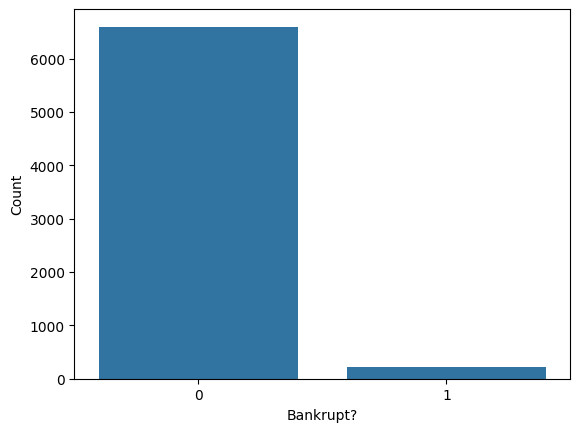

Bankrupt?
0    6599
1     220
Name: count, dtype: int64


In [ ]:
#Count Plot of count of DEATH_EVENT
sns.countplot(x="Bankrupt?",data=data)
plt.ylabel("Count")
plt.xlabel("Bankrupt?")
plt.show()
print(data['Bankrupt?'].value_counts())

In [ ]:
data.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

In [ ]:
cnt = data['Bankrupt?'].value_counts()
r = cnt[0]/cnt[1]
print("Imbalance of class: 0(Didn't bankrupt):1(Bankrupt) = {:.0f}:{:.0f}".format(r, 1))

Imbalance of class: 0(Didn't bankrupt):1(Bankrupt) = 30:1


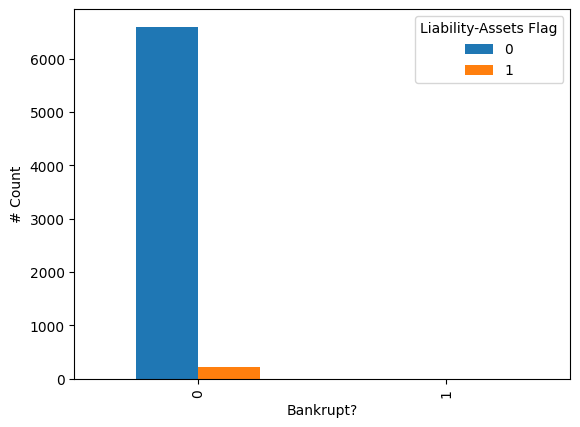

In [ ]:
pd.crosstab(data[' Liability-Assets Flag'],data['Bankrupt?']).plot(kind='bar')
plt.legend(title='Liability-Assets Flag', loc='upper right')
plt.xlabel('Bankrupt?')
plt.ylabel('# Count')
plt.show()

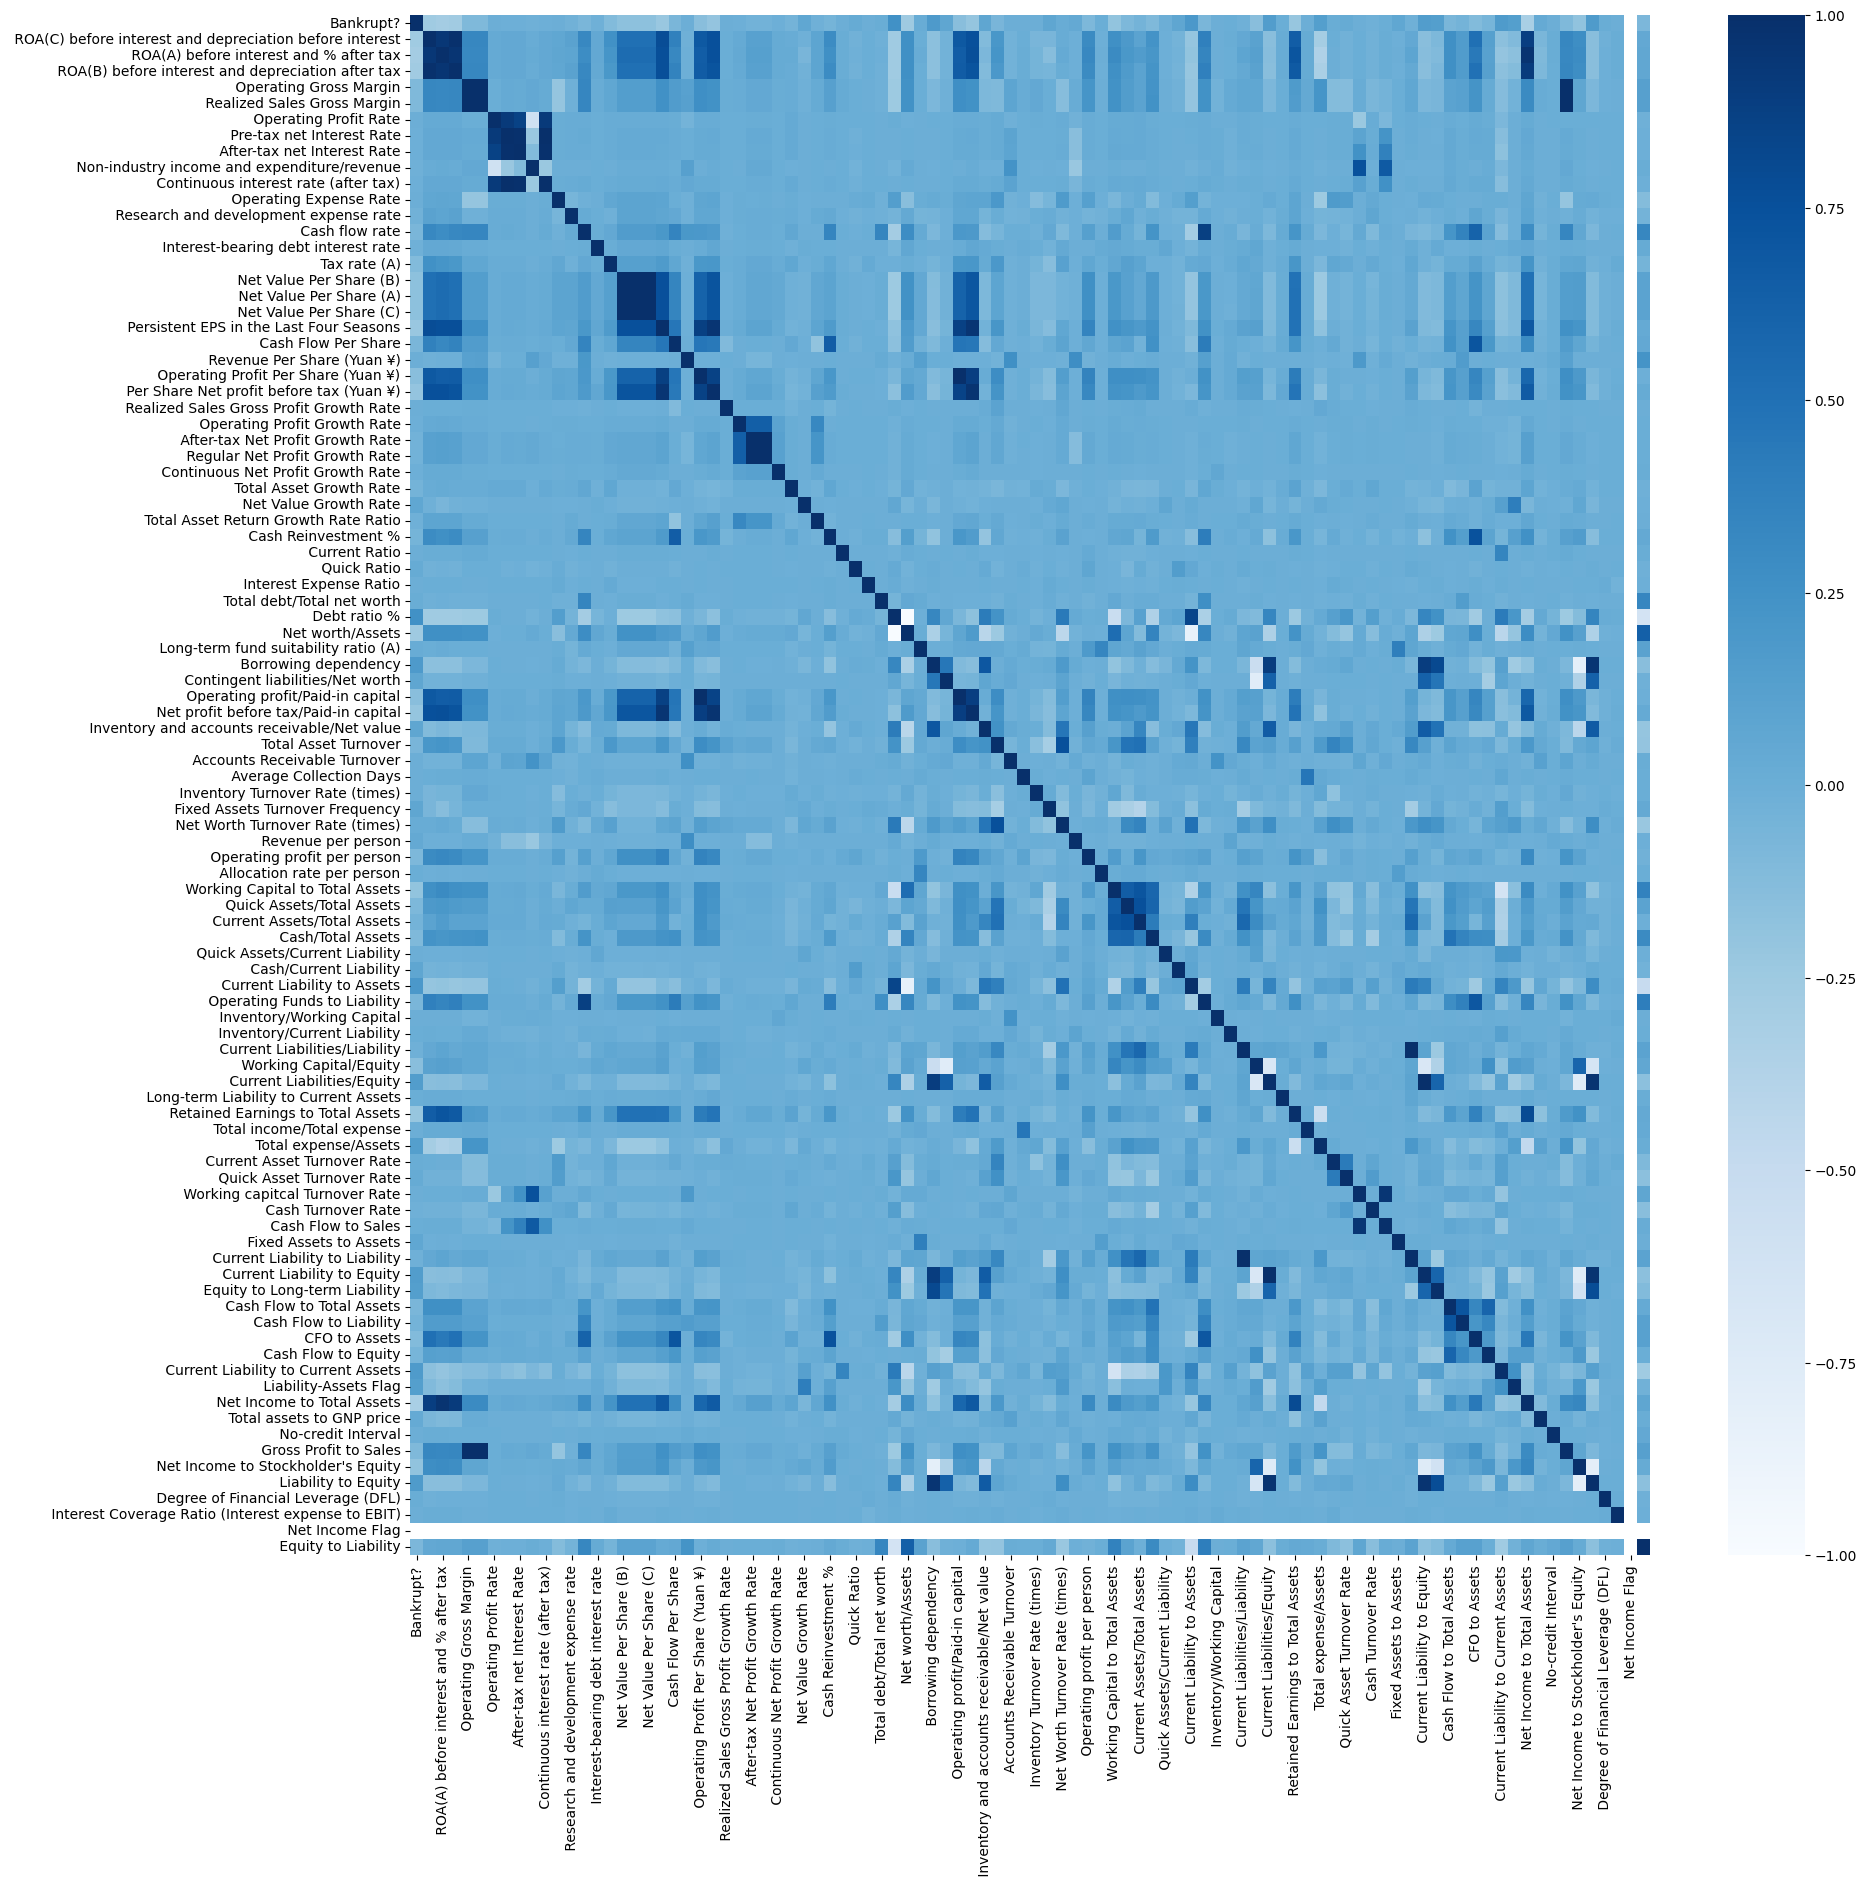

In [ ]:
#Correlation map between the features
plt.figure(figsize=(20, 20))
sns.heatmap(data.corr(), cmap = "Blues")
plt.show()

In [ ]:
data

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


In [ ]:
data.drop(columns=[' Net Income Flag', ' Liability-Assets Flag'], inplace=True)

# ML models on original dataset

Considering all feats except the two flags



In [ ]:
#Split the dataset into train and test set
from sklearn.model_selection import train_test_split

predictors = data.drop("Bankrupt?",axis=1)
target = data["Bankrupt?"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=42)

In [ ]:
#Different ML models
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

#Performance metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [ ]:
lr = LogisticRegression(max_iter=300).fit(X_train, Y_train)
Y_pred_lr = lr.predict(X_test)
print(classification_report(Y_test,Y_pred_lr))
cm_lr = confusion_matrix(Y_test,Y_pred_lr)
print(cm_lr)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1313
           1       0.00      0.00      0.00        51

    accuracy                           0.96      1364
   macro avg       0.48      0.50      0.49      1364
weighted avg       0.93      0.96      0.94      1364

[[1311    2]
 [  51    0]]


In [ ]:
xgb = XGBClassifier().fit(X_train, Y_train)
Y_pred_xgb = xgb.predict(X_test)
print(classification_report(Y_test,Y_pred_xgb))
cm_xgb = confusion_matrix(Y_test,Y_pred_xgb)
print(cm_xgb)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1313
           1       0.63      0.24      0.34        51

    accuracy                           0.97      1364
   macro avg       0.80      0.61      0.66      1364
weighted avg       0.96      0.97      0.96      1364

[[1306    7]
 [  39   12]]


In [ ]:
#SMOTE
import imblearn
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=42)
SX_train, SY_train = smt.fit_resample(X_train, Y_train)
print(SY_train.value_counts())

Bankrupt?
0    5286
1    5286
Name: count, dtype: int64


In [ ]:
lr = LogisticRegression(max_iter=500).fit(SX_train, SY_train)
Y_pred_lr = lr.predict(X_test)
print(classification_report(Y_test,Y_pred_lr))
cm_lr = confusion_matrix(Y_test,Y_pred_lr)
print(cm_lr)

              precision    recall  f1-score   support

           0       0.97      0.75      0.85      1313
           1       0.07      0.45      0.12        51

    accuracy                           0.74      1364
   macro avg       0.52      0.60      0.48      1364
weighted avg       0.94      0.74      0.82      1364

[[990 323]
 [ 28  23]]


In [ ]:
xgb = XGBClassifier().fit(SX_train, SY_train)
Y_pred_xgb = xgb.predict(X_test)
print(classification_report(Y_test,Y_pred_xgb))
cm_xgb = confusion_matrix(Y_test,Y_pred_xgb)
print(cm_xgb)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1313
           1       0.50      0.55      0.52        51

    accuracy                           0.96      1364
   macro avg       0.74      0.76      0.75      1364
weighted avg       0.96      0.96      0.96      1364

[[1285   28]
 [  23   28]]


In [ ]:
#SMOTE
import imblearn
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=42)
SX, SY = smt.fit_resample(predictors, target)
print(SY.value_counts())

Bankrupt?
1    6599
0    6599
Name: count, dtype: int64


In [ ]:
#Split the dataset into train and test set
from sklearn.model_selection import train_test_split

predictors = data.drop("Bankrupt?",axis=1)
target = data["Bankrupt?"]

SX_train,SX_test,SY_train,SY_test = train_test_split(SX,SY,test_size=0.20,random_state=42)

In [ ]:
lr = LogisticRegression(max_iter=600).fit(SX_train, SY_train)
Y_pred_lr = lr.predict(SX_test)
print(classification_report(SY_test,Y_pred_lr))
cm_lr = confusion_matrix(SY_test,Y_pred_lr)
print(cm_lr)

              precision    recall  f1-score   support

           0       0.59      0.73      0.65      1334
           1       0.63      0.48      0.55      1306

    accuracy                           0.61      2640
   macro avg       0.61      0.60      0.60      2640
weighted avg       0.61      0.61      0.60      2640

[[971 363]
 [679 627]]


In [ ]:
xgb = XGBClassifier().fit(SX_train, SY_train)
Y_pred_xgb = xgb.predict(SX_test)
print(classification_report(SY_test,Y_pred_xgb))
cm_xgb = confusion_matrix(SY_test,Y_pred_xgb)
print(cm_xgb)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1334
           1       0.98      1.00      0.99      1306

    accuracy                           0.99      2640
   macro avg       0.99      0.99      0.99      2640
weighted avg       0.99      0.99      0.99      2640

[[1303   31]
 [   1 1305]]


# Considering feat eliminated after corr test

In [ ]:
# Create correlation matrix
corr_matrix = data.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.70)]

# Drop features
df = data.drop(to_drop, axis=1)

In [ ]:
len(to_drop)

34

In [ ]:
to_drop

[' ROA(A) before interest and % after tax',
 ' ROA(B) before interest and depreciation after tax',
 ' Realized Sales Gross Margin',
 ' Pre-tax net Interest Rate',
 ' After-tax net Interest Rate',
 ' Continuous interest rate (after tax)',
 ' Net Value Per Share (A)',
 ' Net Value Per Share (C)',
 ' Persistent EPS in the Last Four Seasons',
 ' Operating Profit Per Share (Yuan ¥)',
 ' Per Share Net profit before tax (Yuan ¥)',
 ' Regular Net Profit Growth Rate',
 ' Net worth/Assets',
 ' Operating profit/Paid-in capital',
 ' Net profit before tax/Paid-in capital',
 ' Inventory and accounts receivable/Net value',
 ' Net Worth Turnover Rate (times)',
 ' Current Assets/Total Assets',
 ' Current Liability to Assets',
 ' Operating Funds to Liability',
 ' Working Capital/Equity',
 ' Current Liabilities/Equity',
 ' Retained Earnings to Total Assets',
 ' Working capitcal Turnover Rate',
 ' Cash Flow to Sales',
 ' Current Liability to Liability',
 ' Current Liability to Equity',
 ' Equity to Long-t

In [ ]:
df

,Bankrupt?,ROA(C) before interest and depreciation before interest,Operating Gross Margin,Operating Profit Rate,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),...,Cash Turnover Rate,Fixed Assets to Assets,Cash Flow to Total Assets,Cash Flow to Equity,Current Liability to Current Assets,Total assets to GNP price,No-credit Interval,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,1,0.370594,0.601457,0.998969,0.302646,1.256969e-04,0.000000e+00,0.458143,7.250725e-04,0.000000,...,4.580000e+08,0.424206,0.637555,0.312905,0.118250,0.009219,0.622879,0.026601,0.564050,0.016469
1,1,0.464291,0.610235,0.998946,0.303556,2.897851e-04,0.000000e+00,0.461867,6.470647e-04,0.000000,...,2.490000e+09,0.468828,0.641100,0.314163,0.047775,0.008323,0.623652,0.264577,0.570175,0.020794
2,1,0.426071,0.601450,0.998857,0.302035,2.361297e-04,2.550000e+07,0.458521,7.900790e-04,0.000000,...,7.610000e+08,0.276179,0.642765,0.314515,0.025346,0.040003,0.623841,0.026555,0.563706,0.016474
3,1,0.399844,0.583541,0.998700,0.303350,1.078888e-04,0.000000e+00,0.465705,4.490449e-04,0.000000,...,2.030000e+09,0.559144,0.579039,0.302382,0.067250,0.003252,0.622929,0.026697,0.564663,0.023982
4,1,0.465022,0.598783,0.998973,0.303475,7.890000e+09,0.000000e+00,0.462746,6.860686e-04,0.000000,...,8.240000e+08,0.309555,0.622374,0.311567,0.047725,0.003878,0.623521,0.024752,0.575617,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.604455,0.998992,0.303510,1.510213e-04,4.500000e+09,0.463734,1.790179e-04,0.113372,...,1.077940e-04,0.400338,0.639806,0.314063,0.027951,0.000466,0.623620,0.027064,0.566193,0.029890
6815,0,0.475162,0.598308,0.998992,0.303520,5.220000e+09,1.440000e+09,0.461978,2.370237e-04,0.371596,...,7.710000e+09,0.096136,0.642072,0.314446,0.031470,0.001959,0.623931,0.027009,0.566018,0.038284
6816,0,0.472725,0.610444,0.998984,0.303512,2.509312e-04,1.039086e-04,0.472189,0.000000e+00,0.490839,...,4.074263e-04,0.055509,0.631678,0.313353,0.007542,0.002840,0.624156,0.026791,0.565158,0.097649
6817,0,0.506264,0.607850,0.999074,0.303498,1.236154e-04,2.510000e+09,0.476123,2.110211e-04,0.181294,...,1.165392e-04,0.246805,0.684857,0.320118,0.022916,0.002837,0.623957,0.026822,0.565302,0.044009


In [ ]:
#Split the dataset into train and test set
from sklearn.model_selection import train_test_split

predictors = df.drop("Bankrupt?",axis=1)
target = df["Bankrupt?"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=42)

In [ ]:
lr = LogisticRegression(max_iter=500).fit(X_train, Y_train)
Y_pred_lr = lr.predict(X_test)
print(classification_report(Y_test,Y_pred_lr))
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(Y_test,Y_pred_lr)
print(cm_lr)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1313
           1       0.00      0.00      0.00        51

    accuracy                           0.96      1364
   macro avg       0.48      0.50      0.49      1364
weighted avg       0.93      0.96      0.94      1364

[[1311    2]
 [  51    0]]


In [ ]:
xgb = XGBClassifier().fit(X_train, Y_train)
Y_pred_xgb = xgb.predict(X_test)
print(classification_report(Y_test,Y_pred_xgb))
cm_xgb = confusion_matrix(Y_test,Y_pred_xgb)
print(cm_xgb)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1313
           1       0.56      0.20      0.29        51

    accuracy                           0.96      1364
   macro avg       0.76      0.59      0.64      1364
weighted avg       0.95      0.96      0.96      1364

[[1305    8]
 [  41   10]]


In [ ]:
#SMOTE
import imblearn
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=42)
SX_train, SY_train = smt.fit_resample(X_train, Y_train)
print(SY_train.value_counts())

Bankrupt?
0    5286
1    5286
Name: count, dtype: int64


In [ ]:
lr = LogisticRegression(max_iter=500).fit(SX_train, SY_train)
Y_pred_lr = lr.predict(X_test)
print(classification_report(Y_test,Y_pred_lr))
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(Y_test,Y_pred_lr)
print(cm_lr)

              precision    recall  f1-score   support

           0       0.97      0.75      0.85      1313
           1       0.07      0.45      0.12        51

    accuracy                           0.74      1364
   macro avg       0.52      0.60      0.48      1364
weighted avg       0.94      0.74      0.82      1364

[[990 323]
 [ 28  23]]


In [ ]:
xgb = XGBClassifier().fit(SX_train, SY_train)
Y_pred_xgb = xgb.predict(X_test)
print(classification_report(Y_test,Y_pred_xgb))
cm_xgb = confusion_matrix(Y_test,Y_pred_xgb)
print(cm_xgb)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1313
           1       0.54      0.57      0.55        51

    accuracy                           0.97      1364
   macro avg       0.76      0.77      0.77      1364
weighted avg       0.97      0.97      0.97      1364

[[1288   25]
 [  22   29]]


In [ ]:
#SMOTE
import imblearn
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=42)
SX, SY = smt.fit_resample(predictors, target)
print(SY.value_counts())

Bankrupt?
1    6599
0    6599
Name: count, dtype: int64


In [ ]:
#Split the dataset into train and test set
from sklearn.model_selection import train_test_split

predictors = data.drop("Bankrupt?",axis=1)
target = data["Bankrupt?"]

SX_train,SX_test,SY_train,SY_test = train_test_split(SX,SY,test_size=0.20,random_state=42)

In [ ]:
lr = LogisticRegression(max_iter=600).fit(SX_train, SY_train)
Y_pred_lr = lr.predict(SX_test)
print(classification_report(SY_test,Y_pred_lr))
cm_lr = confusion_matrix(SY_test,Y_pred_lr)
print(cm_lr)

              precision    recall  f1-score   support

           0       0.59      0.73      0.65      1334
           1       0.63      0.48      0.55      1306

    accuracy                           0.61      2640
   macro avg       0.61      0.60      0.60      2640
weighted avg       0.61      0.61      0.60      2640

[[971 363]
 [679 627]]


In [ ]:
xgb = XGBClassifier().fit(SX_train, SY_train)
Y_pred_xgb = xgb.predict(SX_test)
print(classification_report(SY_test,Y_pred_xgb))
cm_xgb = confusion_matrix(SY_test,Y_pred_xgb)
print(cm_xgb)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1334
           1       0.98      1.00      0.99      1306

    accuracy                           0.99      2640
   macro avg       0.99      0.99      0.99      2640
weighted avg       0.99      0.99      0.99      2640

[[1302   32]
 [   0 1306]]


# Applying RFE for further feat selection

In [ ]:
#RFE
from sklearn.feature_selection import RFE
rfe_lr = RFE(estimator = LogisticRegression(max_iter=600)).fit(SX_train,SY_train)
rfe_dt = RFE(estimator = DecisionTreeClassifier()).fit(SX_train,SY_train)
rfe_rf = RFE(estimator = RandomForestClassifier()).fit(SX_train,SY_train)
rfe_gbc = RFE(estimator = GradientBoostingClassifier()).fit(SX_train,SY_train)
rfe_abc = RFE(estimator = AdaBoostClassifier()).fit(SX_train,SY_train)
rfe_xgb = RFE(estimator = XGBClassifier()).fit(SX_train,SY_train)

In [ ]:
ranking = {'Features': SX_train.columns.values, 'LogisticRegression_Ranking': rfe_lr.ranking_, 'DecisionTree_Ranking': rfe_dt.ranking_,
        'RandomForest_Ranking': rfe_rf.ranking_, 'GradientBoosting_Ranking': rfe_gbc.ranking_, 'AdaBoost_Ranking': rfe_abc.ranking_,
        'XGBoost_Ranking': rfe_xgb.ranking_}
feat_rank = pd.DataFrame(ranking)
feat_rank

,Features,LogisticRegression_Ranking,DecisionTree_Ranking,RandomForest_Ranking,GradientBoosting_Ranking,AdaBoost_Ranking,XGBoost_Ranking
0,ROA(C) before interest and depreciation befor...,8,1,1,1,1,1
1,Operating Gross Margin,9,1,14,9,16,1
2,Operating Profit Rate,1,3,1,1,9,2
3,Non-industry income and expenditure/revenue,15,1,1,1,8,1
4,Operating Expense Rate,1,2,21,22,7,18
5,Research and development expense rate,1,6,3,1,1,1
6,Cash flow rate,11,23,1,1,1,1
7,Interest-bearing debt interest rate,1,1,1,1,1,1
8,Tax rate (A),1,1,23,16,1,1
9,Net Value Per Share (B),26,16,1,1,1,13


In [ ]:
to_drop = [' Cash Flow Per Share', ' Total Asset Turnover',' Working Capital to Total Assets',' Quick Assets/Total Assets']

# Drop features
df.drop(to_drop, axis = 1, inplace=True)

In [ ]:
df.shape

(6819, 56)

In [ ]:
#Split the dataset into train and test set
from sklearn.model_selection import train_test_split

predictors = df.drop("Bankrupt?",axis=1)
target = df["Bankrupt?"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.30,random_state=42)

In [ ]:
lr = LogisticRegression(max_iter=500).fit(X_train, Y_train)
Y_pred_lr = lr.predict(X_test)
print(classification_report(Y_test,Y_pred_lr))
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(Y_test,Y_pred_lr)
print(cm_lr)

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1968
           1       0.09      0.01      0.02        78

    accuracy                           0.96      2046
   macro avg       0.53      0.50      0.50      2046
weighted avg       0.93      0.96      0.94      2046

[[1958   10]
 [  77    1]]


In [ ]:
xgb = XGBClassifier().fit(X_train, Y_train)
Y_pred_xgb = xgb.predict(X_test)
print(classification_report(Y_test,Y_pred_xgb))
cm_xgb = confusion_matrix(Y_test,Y_pred_xgb)
print(cm_xgb)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1968
           1       0.53      0.21      0.30        78

    accuracy                           0.96      2046
   macro avg       0.75      0.60      0.64      2046
weighted avg       0.95      0.96      0.95      2046

[[1954   14]
 [  62   16]]


In [ ]:
predictors = df.drop("Bankrupt?",axis=1)
target = df["Bankrupt?"]
#SMOTE
import imblearn
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=42)
SX, SY = smt.fit_resample(predictors, target)
print(SY.value_counts())

Bankrupt?
1    6599
0    6599
Name: count, dtype: int64


In [ ]:
#Split the dataset into train and test set
from sklearn.model_selection import train_test_split

predictors = data.drop("Bankrupt?",axis=1)
target = data["Bankrupt?"]

SX_train,SX_test,SY_train,SY_test = train_test_split(SX,SY,test_size=0.20,random_state=42)

In [ ]:
lr = LogisticRegression(max_iter=600).fit(SX_train, SY_train)
Y_pred_lr = lr.predict(SX_test)
print(classification_report(SY_test,Y_pred_lr))
cm_lr = confusion_matrix(SY_test,Y_pred_lr)
print(cm_lr)

              precision    recall  f1-score   support

           0       0.59      0.73      0.65      1334
           1       0.63      0.48      0.55      1306

    accuracy                           0.61      2640
   macro avg       0.61      0.60      0.60      2640
weighted avg       0.61      0.61      0.60      2640

[[971 363]
 [679 627]]


In [ ]:
xgb = XGBClassifier().fit(SX_train, SY_train)
Y_pred_xgb = xgb.predict(SX_test)
print(classification_report(SY_test,Y_pred_xgb))
cm_xgb = confusion_matrix(SY_test,Y_pred_xgb)
print(cm_xgb)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1334
           1       0.98      1.00      0.99      1306

    accuracy                           0.99      2640
   macro avg       0.99      0.99      0.99      2640
weighted avg       0.99      0.99      0.99      2640

[[1302   32]
 [   0 1306]]


In [ ]:
xgb = XGBClassifier().fit(SX_train, SY_train)
Y_pred_xgb = xgb.predict(SX_test)
print(classification_report(SY_test,Y_pred_xgb))
cm_xgb = confusion_matrix(SY_test,Y_pred_xgb)
print(cm_xgb)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1334
           1       0.98      1.00      0.99      1306

    accuracy                           0.99      2640
   macro avg       0.99      0.99      0.99      2640
weighted avg       0.99      0.99      0.99      2640

[[1302   32]
 [   0 1306]]


In [ ]:
nb = GaussianNB().fit(SX_train, SY_train)
Y_pred_nb = nb.predict(SX_test)
print(classification_report(SY_test,Y_pred_nb))
cm_nb = confusion_matrix(SY_test,Y_pred_nb)
print(cm_nb)

              precision    recall  f1-score   support

           0       0.66      0.04      0.08      1334
           1       0.50      0.98      0.66      1306

    accuracy                           0.51      2640
   macro avg       0.58      0.51      0.37      2640
weighted avg       0.58      0.51      0.37      2640

[[  60 1274]
 [  31 1275]]


In [ ]:
knn = KNeighborsClassifier().fit(SX_train, SY_train)
Y_pred_knn = knn.predict(SX_test)
print(classification_report(SY_test,Y_pred_knn))
cm_knn = confusion_matrix(SY_test,Y_pred_knn)
print(cm_knn)

              precision    recall  f1-score   support

           0       0.98      0.84      0.91      1334
           1       0.86      0.99      0.92      1306

    accuracy                           0.91      2640
   macro avg       0.92      0.91      0.91      2640
weighted avg       0.92      0.91      0.91      2640

[[1118  216]
 [  18 1288]]


In [ ]:
dt = DecisionTreeClassifier().fit(SX_train, SY_train)
Y_pred_dt = dt.predict(SX_test)
print(classification_report(SY_test,Y_pred_dt))
cm_dt = confusion_matrix(SY_test,Y_pred_dt)
print(cm_dt)

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1334
           1       0.95      0.97      0.96      1306

    accuracy                           0.96      2640
   macro avg       0.96      0.96      0.96      2640
weighted avg       0.96      0.96      0.96      2640

[[1261   73]
 [  38 1268]]


In [ ]:
rf = RandomForestClassifier().fit(SX_train, SY_train)
Y_pred_rf = rf.predict(SX_test)
print(classification_report(SY_test,Y_pred_rf))
cm_rf = confusion_matrix(SY_test,Y_pred_rf)
print(cm_rf)

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1334
           1       0.97      1.00      0.98      1306

    accuracy                           0.98      2640
   macro avg       0.98      0.98      0.98      2640
weighted avg       0.98      0.98      0.98      2640

[[1291   43]
 [   3 1303]]


In [ ]:
gbc = GradientBoostingClassifier().fit(SX_train, SY_train)
Y_pred_gbc = gbc.predict(SX_test)
print(classification_report(SY_test,Y_pred_gbc))
cm_gbc = confusion_matrix(SY_test,Y_pred_gbc)
print(cm_gbc)

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1334
           1       0.94      0.98      0.96      1306

    accuracy                           0.96      2640
   macro avg       0.96      0.96      0.96      2640
weighted avg       0.96      0.96      0.96      2640

[[1252   82]
 [  23 1283]]


In [ ]:
abc = AdaBoostClassifier().fit(SX_train, SY_train)
Y_pred_abc = abc.predict(SX_test)
print(classification_report(SY_test,Y_pred_abc))
cm_abc = confusion_matrix(SY_test,Y_pred_abc)
print(cm_abc)

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      1334
           1       0.93      0.94      0.94      1306

    accuracy                           0.94      2640
   macro avg       0.94      0.94      0.94      2640
weighted avg       0.94      0.94      0.94      2640

[[1242   92]
 [  77 1229]]


In [ ]:
lda = LinearDiscriminantAnalysis().fit(SX_train, SY_train)
Y_pred_lda = lda.predict(SX_test)
print(classification_report(SY_test,Y_pred_lda))
cm_lda = confusion_matrix(SY_test,Y_pred_lda)
print(cm_lda)

              precision    recall  f1-score   support

           0       0.91      0.84      0.87      1334
           1       0.85      0.92      0.88      1306

    accuracy                           0.88      2640
   macro avg       0.88      0.88      0.88      2640
weighted avg       0.88      0.88      0.88      2640

[[1120  214]
 [ 108 1198]]


In [ ]:
qda = QuadraticDiscriminantAnalysis().fit(SX_train, SY_train)
Y_pred_qda = qda.predict(SX_test)
print(classification_report(SY_test,Y_pred_qda))
cm_qda = confusion_matrix(SY_test,Y_pred_qda)
print(cm_qda)

              precision    recall  f1-score   support

           0       0.99      0.20      0.34      1334
           1       0.55      1.00      0.71      1306

    accuracy                           0.60      2640
   macro avg       0.77      0.60      0.52      2640
weighted avg       0.77      0.60      0.52      2640

[[ 272 1062]
 [   4 1302]]


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

In [ ]:
model = Sequential()
model.add(Dense(32,activation='relu',input_dim=55))
model.add(Dense(32,activation='relu',input_dim=32))
model.add(Dense(16,activation='relu',input_dim=32))
model.add(Dense(1,activation='sigmoid'))
#optimizer=adam
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
# simple early stopping
es = EarlyStopping(monitor='loss', mode='min', verbose=1)
model.fit(SX_train,SY_train,epochs=750, callbacks=[es])
Y_pred_nn = model.predict(SX_test)
rounded = [round(x[0]) for x in Y_pred_nn]
Y_pred_nn = rounded
print(classification_report(SY_test,Y_pred_nn))
cm_nn_o1 = confusion_matrix(SY_test,Y_pred_nn)
print(cm_nn_o1)

Epoch 1/750
330/330 [==============================] - 2s 2ms/step - loss: 38101928.0000 - accuracy: 0.5982
Epoch 2/750
330/330 [==============================] - 1s 2ms/step - loss: 7832443.5000 - accuracy: 0.6801
Epoch 3/750
330/330 [==============================] - 1s 2ms/step - loss: 4782853.0000 - accuracy: 0.7187
Epoch 4/750
330/330 [==============================] - 1s 2ms/step - loss: 4019553.5000 - accuracy: 0.7290
Epoch 5/750
330/330 [==============================] - 1s 2ms/step - loss: 3245819.0000 - accuracy: 0.7482
Epoch 6/750
330/330 [==============================] - 1s 2ms/step - loss: 2619954.7500 - accuracy: 0.7625
Epoch 7/750
330/330 [==============================] - 1s 3ms/step - loss: 2409224.7500 - accuracy: 0.7712
Epoch 8/750
330/330 [==============================] - 1s 4ms/step - loss: 2184631.7500 - accuracy: 0.7712
Epoch 9/750
330/330 [==============================] - 2s 5ms/step - loss: 2403184.7500 - accuracy: 0.7643
Epoch 9: early stopping
83/83 [=====

In [ ]:
from sklearn.metrics import classification_report, roc_curve

83/83 [==============================] - 0s 2ms/step


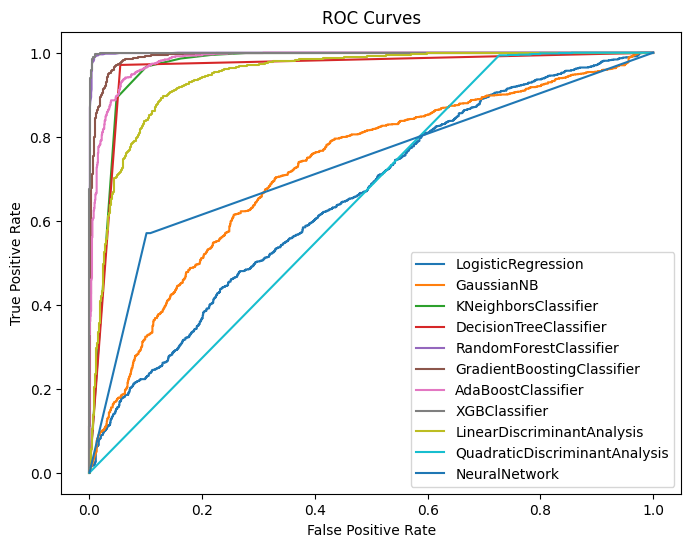

In [ ]:
#ROC Curves of the ML models
plt.figure(figsize=(8,6))

y_pred_proba_lr = lr.predict_proba(SX_test)[::,1]
lr_fpr, lr_tpr,_=roc_curve(SY_test,y_pred_proba_lr)
plt.plot(lr_fpr, lr_tpr,label="LogisticRegression")

y_pred_proba_nb = nb.predict_proba(SX_test)[::,1]
nb_fpr, nb_tpr,_=roc_curve(SY_test,y_pred_proba_nb)
plt.plot(nb_fpr, nb_tpr,label="GaussianNB")

y_pred_proba_knn = knn.predict_proba(SX_test)[::,1]
knn_fpr, knn_tpr,_=roc_curve(SY_test,y_pred_proba_knn)
plt.plot(knn_fpr, knn_tpr,label="KNeighborsClassifier")

y_pred_proba_dt = dt.predict_proba(SX_test)[::,1]
dt_fpr, dt_tpr,_=roc_curve(SY_test,y_pred_proba_dt)
plt.plot(dt_fpr, dt_tpr,label="DecisionTreeClassifier")

y_pred_proba_rf = rf.predict_proba(SX_test)[::,1]
rf_fpr, rf_tpr,_=roc_curve(SY_test,y_pred_proba_rf)
plt.plot(rf_fpr, rf_tpr,label="RandomForestClassifier")

y_pred_proba_gbc = gbc.predict_proba(SX_test)[::,1]
gbc_fpr, gbc_tpr,_=roc_curve(SY_test,y_pred_proba_gbc)
plt.plot(gbc_fpr, gbc_tpr,label="GradientBoostingClassifier")

y_pred_proba_abc = abc.predict_proba(SX_test)[::,1]
abc_fpr, abc_tpr,_=roc_curve(SY_test,y_pred_proba_abc)
plt.plot(abc_fpr, abc_tpr,label="AdaBoostClassifier")

y_pred_proba_xgb = xgb.predict_proba(SX_test)[::,1]
xgb_fpr, xgb_tpr,_=roc_curve(SY_test,y_pred_proba_xgb)
plt.plot(xgb_fpr, xgb_tpr,label="XGBClassifier")

y_pred_proba_lda = lda.predict_proba(SX_test)[::,1]
lda_fpr, lda_tpr,_=roc_curve(SY_test,y_pred_proba_lda)
plt.plot(lda_fpr, lda_tpr,label="LinearDiscriminantAnalysis")

y_pred_proba_qda = qda.predict_proba(SX_test)[::,1]
qda_fpr, qda_tpr,_=roc_curve(SY_test,y_pred_proba_qda)
plt.plot(qda_fpr, qda_tpr,label="QuadraticDiscriminantAnalysis")

y_pred_proba_nn = model.predict(SX_test).ravel()
nn_fpr, nn_tpr,_=roc_curve(SY_test,y_pred_proba_nn)
plt.plot(nn_fpr, nn_tpr,label="NeuralNetwork")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()